In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec
import math
import statsmodels.api as sm
import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from scipy import stats, ndimage, misc
import csv
import opto_util as opto
from matplotlib.ticker import FormatStrFormatter

mpl.style.use('classic')
%matplotlib inline


In [2]:
full_df=pd.read_csv('20210415_full_df.csv')

/Users/travish/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,24,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
intKclusters=pd.read_csv('interneuron_Kclusters_1203.csv')
full_df = pd.merge(full_df, intKclusters,  how='left', left_on=['exp_id','headstage'], right_on = ['experiment','headstage'])
full_df.Kcluster.unique()

array([ 1., nan,  0.,  2.])

In [5]:
Cs_internal=full_df[full_df.internal=='Cs']

standard_df=full_df[full_df.internal=='standard']
standard_df=standard_df[standard_df.notes.isnull()]
print (np.shape(standard_df))

(16286, 85)


In [6]:
RorbAi167=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='Ai167')]
RorbKv=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
SstAi167=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='Ai167')]
SstKv=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PvalbKv=standard_df[(standard_df.presynapticCre=='Pvalb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PenkKv=standard_df[(standard_df.presynapticCre=='Penk') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Tlx3Kv=standard_df[(standard_df.presynapticCre=='Tlx3') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Scnn1aAi167=standard_df[(standard_df.presynapticCre=='Scnn1a') & (standard_df.presynapticEffector=='Ai167')]

Sst=standard_df[standard_df.presynapticCre=='Sst']
Ntsr1=standard_df[standard_df.presynapticCre=='Ntsr1']
Rorb=standard_df[standard_df.presynapticCre=='Rorb']
Scnn1a=standard_df[standard_df.presynapticCre=='Scnn1a']

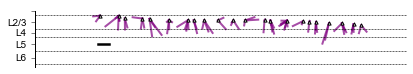

In [9]:
df=PvalbKv
df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0

for name, group in grouped:
    group=group.reset_index()
    cnxs=group[group.cnx=='inhibitory']
    if len(cnxs.index)>1:
        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1
        nametag="cell"+str(count)+"_"
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='purple',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='^', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Pvalb_pyr_converge.svg')


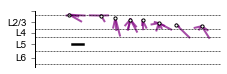

In [11]:
df=PvalbKv
df=df[(df.post_layer==2) & (df.Kcluster==1)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0
for name, group in grouped:
    group=group.reset_index()
    cnxs=group[group.cnx=='inhibitory']
    if len(cnxs.index)>1:
        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='purple',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='o', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Pvalb_fsi_converge.svg')

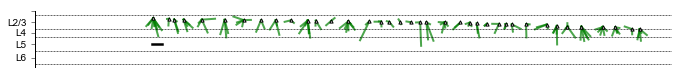

In [12]:
df=Sst
df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0

for name, group in grouped:
    group=group.reset_index()
    cnxs=group[group.cnx=='inhibitory']
    if len(cnxs.index)>1:
        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='green',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='^', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Sst_pyr_converge.svg')


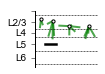

In [13]:
df=Sst
df=df[(df.post_layer==2) & (df.Kcluster==1)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0
for name, group in grouped:
    group=group.reset_index()
    cnxs=group[group.cnx=='inhibitory']
    if len(cnxs.index)>1:

        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='green',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='o', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Sst_fsi_converge.svg')

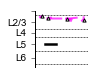

In [15]:
df=PenkKv
df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0


for name, group in grouped:
    group=group.reset_index()

    cnxs=group[group.cnx=='excitatory']
    if len(cnxs.index)>1:
        #cnxs=cnxs.reset_index()
        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='magenta',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='^', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Penk_pyr_converge.svg')


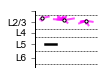

In [16]:
df=PenkKv
df=df[(df.post_layer==2) & (df.Kcluster==1)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0
for name, group in grouped:
    group=group.reset_index()

    cnxs=group[group.cnx=='excitatory']
    if len(cnxs.index)>1:

        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='magenta',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='o', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")

fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Penk_fsi_converge.svg')

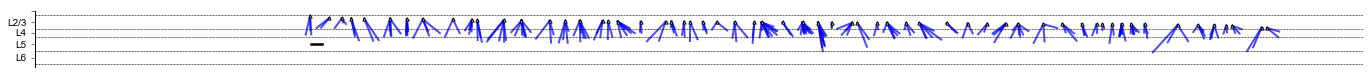

In [17]:
df=Rorb
df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0

for name, group in grouped:
    group=group.reset_index()

    cnxs=group[group.cnx=='excitatory']
    if len(cnxs.index)>1:

        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1
        nametag="cell"+str(count)+"_"

        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='blue',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='^', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Rorb_pyr_converge.svg')


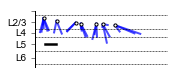

In [18]:
df=Rorb
df=df[(df.post_layer==2) & (df.Kcluster==1)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0
for name, group in grouped:
    group=group.reset_index()

    cnxs=group[group.cnx=='excitatory']
    if len(cnxs.index)>1:

        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='blue',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='o', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Rorb_fsi_converge.svg')

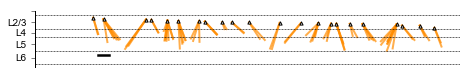

In [19]:
df=Tlx3Kv
df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0

for name, group in grouped:
    group=group.reset_index()
    count_test=0
    cnxs=group[group.cnx=='excitatory']
    if len(cnxs.index)>1:

        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1


        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='darkorange',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='^', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [830,830], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Tlx3_pyr_converge.svg')


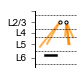

In [20]:
df=Tlx3Kv
df=df[(df.post_layer==2) & (df.Kcluster==1)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['toPia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'headstage'], sort=False)
x_offset=100
count=0
for name, group in grouped:
    group=group.reset_index()
    count_test=0
    cnxs=group[group.cnx=='excitatory']
    if len(cnxs.index)>1:

        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        post_pia=np.mean(cnxs.toPia)
        count+=1
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.y_pia[cnx], post_pia], lw=2, alpha=0.7, c='darkorange',zorder=0)
        plt.scatter([x_offset],[post_pia],marker='o', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [830,830], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Tlx3_fsi_converge.svg')